In [12]:
import glob as glob
import numpy as np
import cv2
import random
emotions = ["NEUTRAL", "ANGER", "DISGUST", "FEAR", "HAPPY", "SADNESS", "SURPRISE"] #Emotion list
data = {}
def get_files(emotion): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("/Users/sheetalsuchit/Downloads/Pract 3/%s/*" %emotion)
    random.shuffle(files)
    training = files[:int(len(files)*0.09)] #get first 20% of file list
    prediction = files[-int(len(files)*0.001):] #get last 3% of file list
    return training, prediction

In [13]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []
    for emotion in emotions:
        training, prediction = get_files(emotion)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            img = cv2.cv2.imread(item) #open image
            img = cv2.cv2.resize(img, (60,60))
            img = cv2.cv2.cvtColor(img, cv2.cv2.COLOR_BGR2GRAY)
            training_data.append(img) #append image array to training data list
            training_labels.append(emotions.index(emotion))
        for item in prediction: #repeat above process for prediction set
            img = cv2.cv2.imread(item)
            img = cv2.cv2.cvtColor(img, cv2.cv2.COLOR_BGR2GRAY)
            img = cv2.cv2.resize(img, (60,60))
            prediction_data.append(img)
            prediction_labels.append(emotions.index(emotion))
    return training_data, training_labels, prediction_data, prediction_labels

In [14]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print (svc_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [15]:
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

In [16]:
training_data, training_labels, prediction_data, prediction_labels = make_sets()

In [17]:
training_data = np.array(training_data)
training_data = training_data.reshape((len(training_data),3600))
prediction_data = np.array(prediction_data)
prediction_data = prediction_data.reshape((len(prediction_data),3600))

In [19]:
len(training_labels)

1717

In [20]:
evaluate_cross_validation(svc_1, training_data, training_labels, 5)

[0.2877907  0.27906977 0.31195335 0.27113703 0.24781341]
Mean score: 0.280 (+/-0.010)


In [21]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    return y_pred

In [22]:
y_pred = train_and_evaluate(svc_1, training_data, prediction_data, training_labels, prediction_labels)

Accuracy on training set:
0.988351776354106
Accuracy on testing set:
0.13513513513513514
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.29      0.02         7
           1       0.00      0.00      0.00         2
           2       0.01      0.33      0.02         3
           3       0.97      0.13      0.23       576
           5       0.01      0.33      0.02         3
           6       0.00      0.00      0.00         1

   micro avg       0.14      0.14      0.14       592
   macro avg       0.17      0.18      0.05       592
weighted avg       0.95      0.14      0.23       592

Confusion Matrix:
[[  2   3   0   1   0   1]
 [  0   0   1   0   1   0]
 [  0   2   1   0   0   0]
 [227  72  83  76  86  32]
 [  0   1   0   1   1   0]
 [  1   0   0   0   0   0]]


In [24]:
len(prediction_data)

592

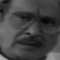

In [69]:
from PIL import Image
Image.fromarray(prediction_data[311].reshape(60,60))

In [70]:
pred = prediction_labels[311]
print(emotions[pred])

FEAR


In [71]:
print(emotions[y_pred[311]])

NEUTRAL


Lets predict age now.

In [29]:
agelist = ["YOUNG", "OLD", "CHILD", "MIDDLE"] #age list
data = {}
def get_files_age(age): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("/Users/sheetalsuchit/Downloads/Pract 3/%s/*" %age)
    random.shuffle(files)
    training = files[:int(len(files)*0.1)] #get first 10% of file list
    prediction = files[-int(len(files)*0.05):] #get last 5% of file list
    return training, prediction

In [30]:
def make_sets_age():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []
    for age in agelist:
        training, prediction = get_files_age(age)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            img = cv2.cv2.imread(item) #open image
            img = cv2.cv2.resize(img, (60,60))
            img = cv2.cv2.cvtColor(img, cv2.cv2.COLOR_BGR2GRAY)
            training_data.append(img) #append image array to training data list
            training_labels.append(agelist.index(age))
        for item in prediction: #repeat above process for prediction set
            img = cv2.cv2.imread(item)
            img = cv2.cv2.cvtColor(img, cv2.cv2.COLOR_BGR2GRAY)
            img = cv2.cv2.resize(img, (60,60))
            prediction_data.append(img)
            prediction_labels.append(agelist.index(age))
    return training_data, training_labels, prediction_data, prediction_labels

In [31]:
from sklearn.svm import SVC
svc_2 = SVC(kernel='linear')
print (svc_2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [32]:
training_data_age, training_labels_age, prediction_data_age, prediction_labels_age = make_sets_age()

In [33]:
training_data_age = np.array(training_data_age)
training_data_age = training_data_age.reshape((len(training_data_age),3600))
prediction_data_age = np.array(prediction_data_age)
prediction_data_age = prediction_data_age.reshape((len(prediction_data_age),3600))

In [34]:
evaluate_cross_validation(svc_2, training_data_age, training_labels_age, 5)

[0.44191344 0.4214123  0.41685649 0.44646925 0.41780822]
Mean score: 0.429 (+/-0.006)


In [35]:
y_pred_age = train_and_evaluate(svc_2, training_data_age, prediction_data_age, training_labels_age, prediction_labels_age)

Accuracy on training set:
0.9922515952597994
Accuracy on testing set:
0.4260948905109489
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.43      0.42       395
           1       0.17      0.21      0.19       158
           2       0.25      0.20      0.22         5
           3       0.54      0.49      0.51       538

   micro avg       0.43      0.43      0.43      1096
   macro avg       0.34      0.33      0.34      1096
weighted avg       0.44      0.43      0.43      1096

Confusion Matrix:
[[168  79   1 147]
 [ 45  33   0  80]
 [  1   0   1   3]
 [186  85   2 265]]


In [36]:
from sklearn.svm import SVC
svc_3 = SVC(kernel='poly')
print (svc_3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [37]:
evaluate_cross_validation(svc_3, training_data_age, training_labels_age, 5)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.4715262  0.46241458 0.47835991 0.54214123 0.47945205]
Mean score: 0.487 (+/-0.014)


In [38]:
y_pred_age = train_and_evaluate(svc_3, training_data_age, prediction_data_age, training_labels_age, prediction_labels_age)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set:
0.9922515952597994
Accuracy on testing set:
0.4698905109489051
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       395
           1       0.26      0.27      0.27       158
           2       0.20      0.20      0.20         5
           3       0.55      0.51      0.53       538

   micro avg       0.47      0.47      0.47      1096
   macro avg       0.37      0.37      0.37      1096
weighted avg       0.47      0.47      0.47      1096

Confusion Matrix:
[[194  44   2 155]
 [ 45  43   0  70]
 [  3   0   1   1]
 [181  78   2 277]]


In [73]:
pred = prediction_labels_age[543]
print(agelist[pred])

OLD


In [74]:
agelist[y_pred_age[543]]

'MIDDLE'

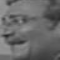

In [72]:
from PIL import Image
Image.fromarray(prediction_data_age[543].reshape(60,60))

In [42]:
from sklearn.svm import SVC
svc_4 = SVC(kernel='rbf')
print (svc_3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [43]:
evaluate_cross_validation(svc_4, training_data_age, training_labels_age, 5)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.46697039 0.48291572 0.476082   0.50113895 0.49771689]
Mean score: 0.485 (+/-0.006)


In [44]:
y_pred_age = train_and_evaluate(svc_4, training_data_age, prediction_data_age, training_labels_age, prediction_labels_age)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set:
0.9922515952597994
Accuracy on testing set:
0.4844890510948905
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       395
           1       0.00      0.00      0.00       158
           2       0.00      0.00      0.00         5
           3       0.49      0.99      0.65       538

   micro avg       0.48      0.48      0.48      1096
   macro avg       0.12      0.25      0.16      1096
weighted avg       0.24      0.48      0.32      1096

Confusion Matrix:
[[  0   0   0 395]
 [  1   0   0 157]
 [  0   0   0   5]
 [  5   2   0 531]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
from sklearn.svm import SVC
svc_5 = SVC(kernel='sigmoid')
print (svc_5)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [76]:
evaluate_cross_validation(svc_5, training_data_age, training_labels_age, 5)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.47835991 0.48291572 0.48063781 0.50341686 0.50684932]
Mean score: 0.490 (+/-0.006)


In [77]:
y_pred_age = train_and_evaluate(svc_5, training_data_age, prediction_data_age, training_labels_age, prediction_labels_age)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set:
0.49042844120328166
Accuracy on testing set:
0.4908759124087591
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       395
           1       0.00      0.00      0.00       158
           2       0.00      0.00      0.00         5
           3       0.49      1.00      0.66       538

   micro avg       0.49      0.49      0.49      1096
   macro avg       0.12      0.25      0.16      1096
weighted avg       0.24      0.49      0.32      1096

Confusion Matrix:
[[  0   0   0 395]
 [  0   0   0 158]
 [  0   0   0   5]
 [  0   0   0 538]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [78]:
agelist[3]

'MIDDLE'